In [1]:
#importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time
print('all imported')

all imported


In [2]:
#decaring the start time
st = time.time()

#converting the file to a dataframe and displaying it
df_titanic = pd.read_csv('Titanic-Dataset.csv')
df_titanic.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#to get the total value of the data i am working on
df_titanic.shape

(891, 12)

In [4]:
#to get the name and age of oldest passenger in the boat and convert it to a dataframe (just to test my knowledge)
max_age = df_titanic['Age'].max()
passenger_name = df_titanic.loc[df_titanic['Age'] == max_age, 'Name']
oldest_passenger_and_age = pd.DataFrame({'Oldest Passenger': passenger_name, 'Age':max_age})
oldest_passenger_and_age

,Oldest Passenger,Age
630,"Barkworth, Mr. Algernon Henry Wilson",80.0


In [5]:
#geting info about the data
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#dropping columns that might introduce noise to the analysis
df_titanic.drop(['Name','Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
#to check the columns that has a null values and the number of null values in each
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: ylabel='Age'>

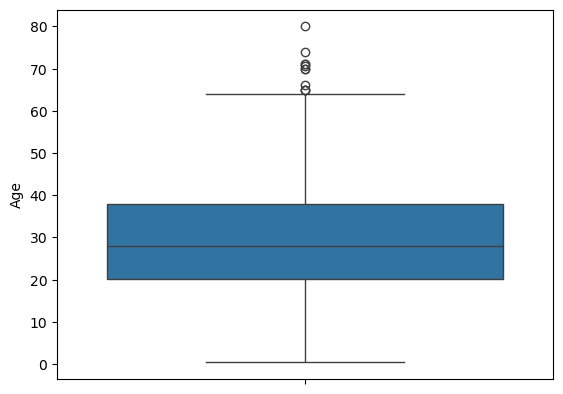

In [8]:
#The age column has 177 null values, so we need to fill it with the best central tendency, to ascertain the best central tendency we need to do a boxplot
sns.boxplot(df_titanic['Age'])

In [9]:
#as we can see, there is significant outlier, so the best central tendency to use is median
median = df_titanic['Age'].median()
df_titanic['Age'] = df_titanic['Age'].fillna(median)
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Text(0.5, 1.0, 'Vizualizing the survival column')

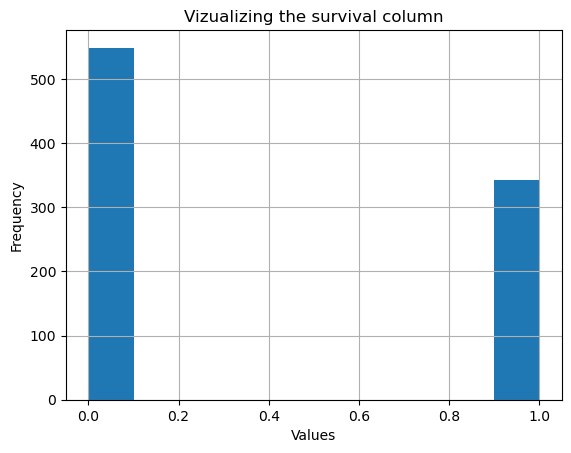

In [10]:
#practicing my visualization skills to visualize the 'Survival' column
viz = df_titanic['Survived'].hist()
viz.set_xlabel('Values')
viz.set_ylabel('Frequency')
viz.set_title('Vizualizing the survival column')

<Axes: >

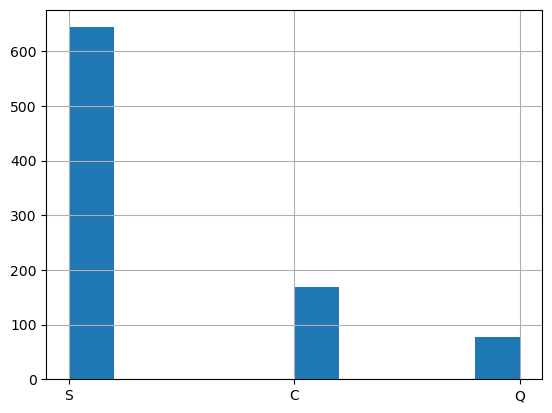

In [11]:
#visualizing the column 'Embarked'
df_titanic['Embarked'].hist()

In [12]:
#we have seen that the sex and embarked column are in strings, they must be converted to integer before applying model
from sklearn.preprocessing import LabelEncoder
Label_encode = LabelEncoder()
sex = Label_encode.fit_transform(df_titanic['Sex'])
embarked = Label_encode.fit_transform(df_titanic['Embarked'])
df_titanic['Sex'] = sex
df_titanic['Embarked'] = embarked
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [13]:
#to now be certain that no column contain a null value
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df_titanic['Embarked'].value_counts()

Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64

In [15]:
#dropping the rows in which the value in the Embarked column has been encoded 3 because they were originally null values
df_titanic = df_titanic[df_titanic['Embarked']!= 3]
df_titanic.shape

(889, 8)

In [16]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.6 KB


In [17]:
#to display the current rows and columns
df_titanic.shape

(889, 8)

In [18]:
#to display the current dataset
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [19]:
#getting the features(independent variables) and the target(dependent variable) and assigning them to the varables x and y respectively
x = df_titanic.drop('Survived', axis = 1)
y = df_titanic['Survived']

In [20]:
#importing all models to determine which to use based on accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
print('all scikit library imported')

all scikit library imported


In [21]:
#listing all the models
models = [LogisticRegression(max_iter=1500), DecisionTreeClassifier(),SVC(kernel='linear'),SVC(kernel='poly'),SVC(kernel='rbf'),SVC(kernel='sigmoid'), KNeighborsClassifier(),RandomForestClassifier(random_state=0),GradientBoostingClassifier()]
#iterating through the models to compare their accuracies in order to select the most accurate one
def model_compare():
    for model in models:
        cv_score = cross_val_score(model, x, y, cv= 5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        percentage_mean_accuracy = round(mean_accuracy*100, 2)
        print('The accuracy of ', model, ' is ', percentage_mean_accuracy, '%')
        print('..............................................................')
model_compare()


The accuracy of  LogisticRegression(max_iter=1500)  is  78.63 %
..............................................................
The accuracy of  DecisionTreeClassifier()  is  77.73 %
..............................................................
The accuracy of  SVC(kernel='linear')  is  78.74 %
..............................................................
The accuracy of  SVC(kernel='poly')  is  64.68 %
..............................................................
The accuracy of  SVC()  is  67.38 %
..............................................................
The accuracy of  SVC(kernel='sigmoid')  is  58.16 %
..............................................................
The accuracy of  KNeighborsClassifier()  is  69.07 %
..............................................................
The accuracy of  RandomForestClassifier(random_state=0)  is  80.77 %
..............................................................
The accuracy of  GradientBoostingClassifier()  is  82.45 %
........

In [22]:
#splitting the data into  training and test data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [26]:
#since the most accurate model is GradientBoostingClassifier, i will go with that. Saving GradientBoostingClassifier as model
model = GradientBoostingClassifier()

#fitting the training data into the model
model.fit(X_train, y_train)

#predicting the test target data
y_pred_test = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
percentage_test_accuracy = round(test_accuracy*100, 2)
print('The test accuracy using Gradient Boosting Classifier is ', percentage_test_accuracy, '%')


The test accuracy using Gradient Boosting Classifier is  75.28 %


In [24]:
et = time.time()
elp = round(et - st, 2)
print('elapsed time for the process is', elp, 's')


elapsed time for the process is 67.96 s


In [25]:

#to allow the machine to predict a scenario based on the inputed data
input_data = (3,1, 34.50, 0, 0, 7.8292,5)
input_array=np.asarray(input_data)

#reshaping the array
input_array_reshape = input_array.reshape(1,-1)
prediction= model.predict(input_array_reshape)
print(prediction)

if prediction == 0:
    print('The Individual will die')
else:
    print('The Individual will survive')

[0]
The Individual will die


c:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
